In [84]:
%pylab inline
import seaborn as sns
sns.set()
sns.set_style("ticks")

Populating the interactive namespace from numpy and matplotlib


# EFFECT OF SPARSITY

In [85]:
nsim=6
sparsities=[0.06,0.08,0.1,0.2,0.3,0.5]

In [86]:
#data import
MJA=[]
MJB=[]
MJAB=[]
for i in range(nsim):
    mja=load("s"+str(i+1)+"/mJA.npy")
    mjb=load("s"+str(i+1)+"/mJB.npy")
    mjab=load("s"+str(i+1)+"/mJAB.npy")
    MJA.append(mja)
    MJB.append(mjb)
    MJAB.append(mjab)

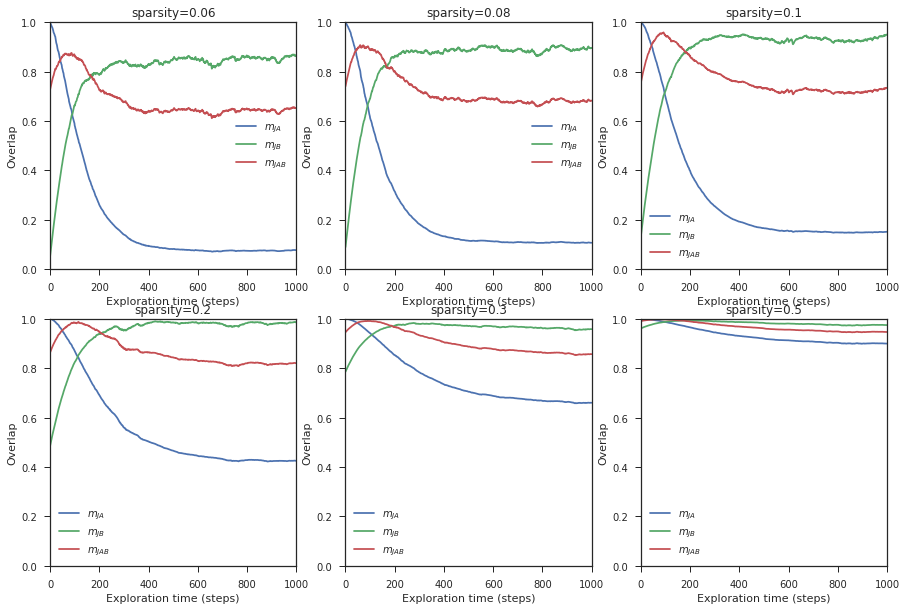

In [87]:
#PLOTTING: trajectories
figure(figsize=(15,10))
for i in range(nsim):
    subplot(2,3,i+1)
    x=asarray(range(len(MJA[i])))
    plot(x,MJA[i],label=r"$m_{JA}$")
    plot(x,MJB[i],label=r"$m_{JB}$")
    plot(x,MJAB[i],label=r"$m_{JAB}$")
    axis([0,1000,0,1])
    xlabel("Exploration time (steps)")
    ylabel("Overlap")
    title("sparsity="+str(sparsities[i]))
    legend()

Time of maximal MJAB seems quite constant with sparsity.
It also seem to correspond to the point MJA=MJB. This has to be checked and maybe is possible to demonstrate analitically.

## HALF LEARNING RATE

In [130]:
nsim=6
sparsities=[0.06,0.08,0.1,0.2,0.3,0.5]

In [131]:
#data import
MJA=[]
MJB=[]
MJAB=[]
for i in range(nsim):
    mja=load("s1"+str(i+1)+"/mJA.npy")
    mjb=load("s1"+str(i+1)+"/mJB.npy")
    mjab=load("s1"+str(i+1)+"/mJAB.npy")
    MJA.append(mja)
    MJB.append(mjb)
    MJAB.append(mjab)

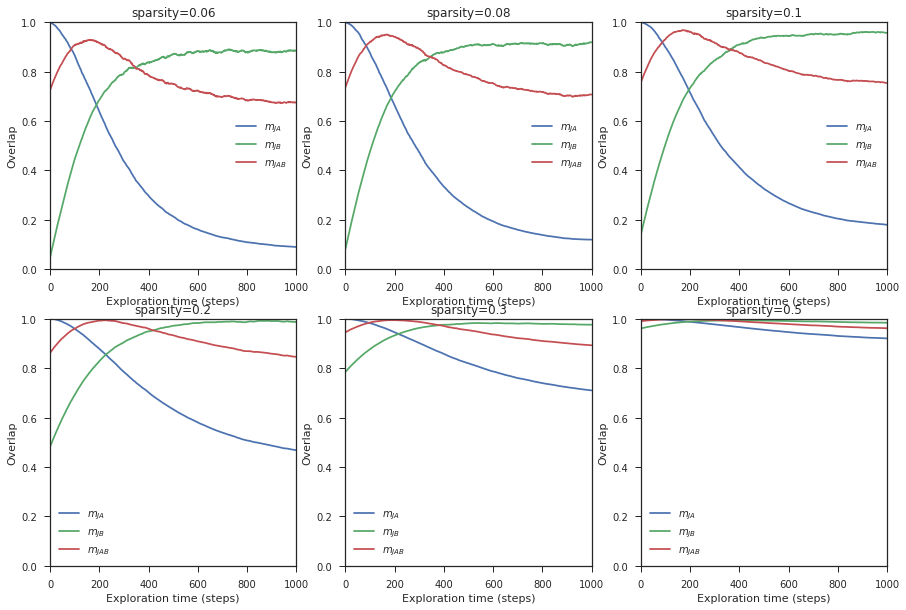

In [132]:
#PLOTTING: trajectories
figure(figsize=(15,10))
for i in range(nsim):
    subplot(2,3,i+1)
    x=asarray(range(len(MJA[i])))
    plot(x,MJA[i],label=r"$m_{JA}$")
    plot(x,MJB[i],label=r"$m_{JB}$")
    plot(x,MJAB[i],label=r"$m_{JAB}$")
    axis([0,1000,0,1])
    xlabel("Exploration time (steps)")
    ylabel("Overlap")
    title("sparsity="+str(sparsities[i]))
    legend()

# SINGLE DYNAMICS PLOT

In [135]:
ma=load("s21/mJA.npy")
mb=load("s21/mJB.npy")
mab=load("s21/mJAB.npy")

In [136]:
t=asarray(range(len(ma)))

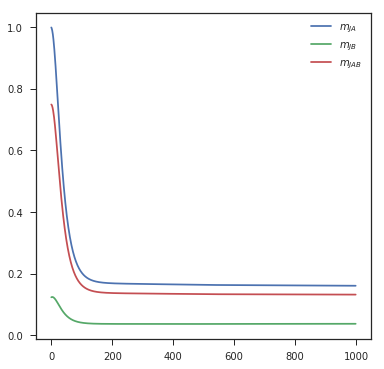

In [138]:
figure(figsize=(6,6))
plot(t,ma,label=r"$m_{JA}$")
plot(t,mb,label=r"$m_{JB}$")
plot(t,mab,label=r"$m_{JAB}$")
legend()

# ATTRACTOR DYNAMICS ANALYSIS

The systems exihibit 2 attractors between the first 2 crossing points

In [66]:
%pylab inline
import seaborn as sns
sns.set()
sns.set_style("white")

Populating the interactive namespace from numpy and matplotlib


In [72]:
nsim=6
sparsities=[0.06,0.08,0.1,0.2,0.3,0.5]

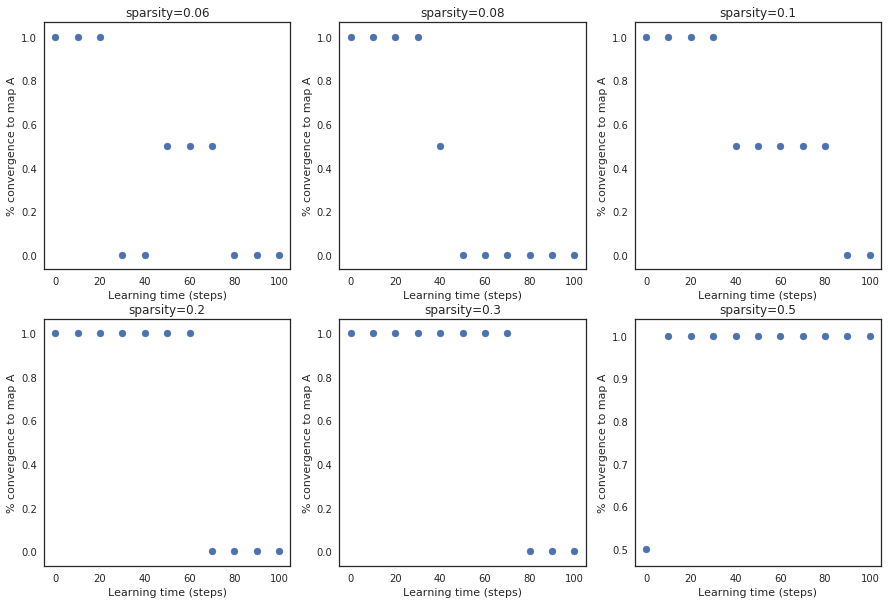

In [73]:
figure(figsize=(15,10))
for s in range(nsim):
    t=np.load("s"+str(s+1)+"/Janalysis/timesteps.npy")
    MA=np.load("s"+str(s+1)+"/Janalysis/MA.npy")
    MB=np.load("s"+str(s+1)+"/Janalysis/MB.npy")
    counts=[]
    for i in range(len(t)):
        count=0
        for j in range(len(MA[i])):
            if MA[i][j]>MB[i][j]:
                count+=1
        counts.append(float(count)/float(len(MA[i])))
    subplot(2,3,s+1)
    scatter(t,counts)
    xlabel("Learning time (steps)")
    ylabel("% convergence to map A")
    title("sparsity="+str(sparsities[s]))

## HALF LEARNING RATE

In [133]:
nsim=6
sparsities=[0.06,0.08,0.1,0.2,0.3,0.5]

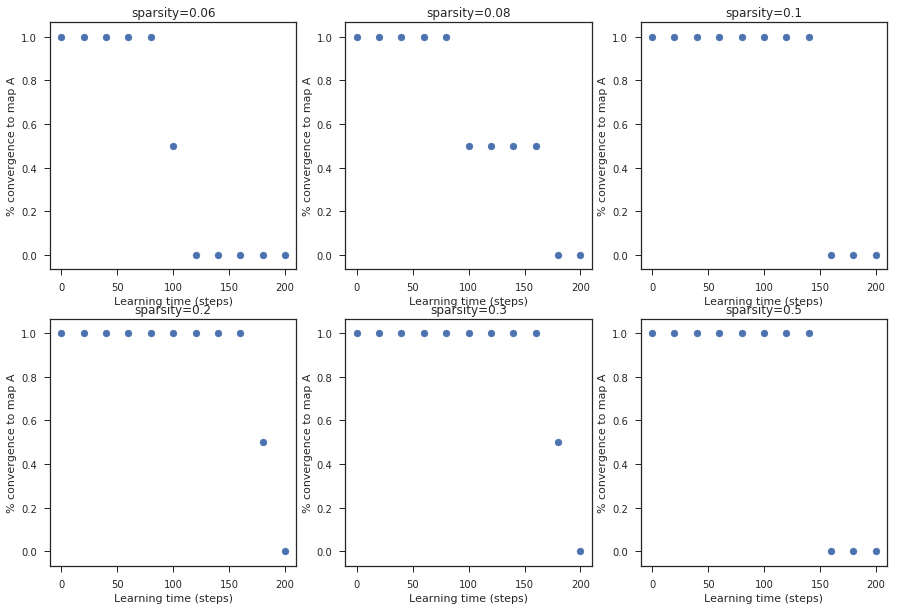

In [134]:
figure(figsize=(15,10))
for s in range(nsim):
    t=np.load("s1"+str(s+1)+"/Janalysis/timesteps.npy")
    MA=np.load("s1"+str(s+1)+"/Janalysis/MA.npy")
    MB=np.load("s1"+str(s+1)+"/Janalysis/MB.npy")
    counts=[]
    for i in range(len(t)):
        count=0
        for j in range(len(MA[i])):
            if MA[i][j]>MB[i][j]:
                count+=1
        counts.append(float(count)/float(len(MA[i])))
    subplot(2,3,s+1)
    scatter(t,counts)
    xlabel("Learning time (steps)")
    ylabel("% convergence to map A")
    title("sparsity="+str(sparsities[s]))

# ACTIVITY PLOTTING

In [296]:
simname=21

In [297]:
gridA=np.load("s"+str(simname)+"/gridA.npy")
gridB=np.load("s"+str(simname)+"/gridB.npy")
V=np.load("s"+str(simname)+"/Janalysis/V8.npy")

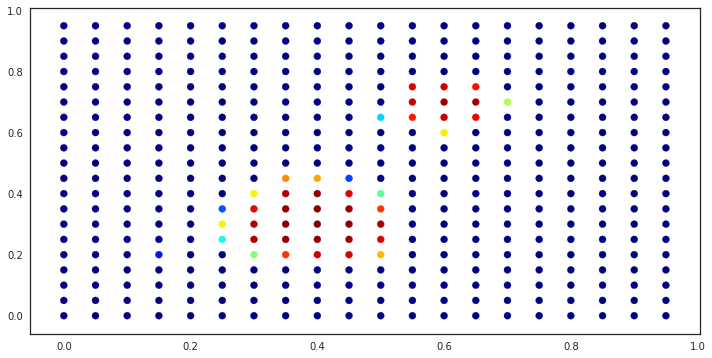

In [298]:
scatter(gridA.T[0],gridA.T[1],c=V,cmap=cm.jet)

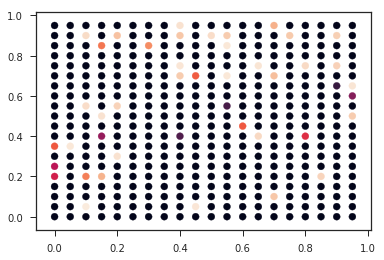

In [151]:
scatter(gridB.T[0],gridB.T[1],c=V)

# SPATIAL PROFILE ANALYSIS OF J

Analysis of the spatial profile of the connections (strength as a function of the distance) in a similar fashion than in Stringer 2002 

In [158]:
%pylab inline
import seaborn as sns
sns.set()
sns.set_style("white")

def PeriodicDistance(r_i,r_j):
        if np.abs(r_i[0]-r_j[0])<0.5:
            dx=np.abs(r_i[0]-r_j[0])
        else:
            dx=1-np.abs(r_i[0]-r_j[0])
            
        if np.abs(r_i[1]-r_j[1])<0.5:
            dy=np.abs(r_i[1]-r_j[1])
        else:
            dy=1-np.abs(r_i[1]-r_j[1])
        
        d=np.sqrt(pow(dx,2)+pow(dy,2))
           
        return d

Populating the interactive namespace from numpy and matplotlib


/home/davide/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['ma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [258]:
simname=13

In [293]:
J=np.load("s"+str(simname)+"/J250.npy")
gridA=np.load("s"+str(simname)+"/gridA.npy")
gridB=np.load("s"+str(simname)+"/gridB.npy")

In [294]:
#J1j connectivity profile
Jval=np.zeros(len(J))
dA=np.zeros(len(J))
dB=np.zeros(len(J))
for i in range(len(J)):
    dA[i]=PeriodicDistance(gridA[0],gridA[i])
    dB[i]=PeriodicDistance(gridB[0],gridB[i])
    Jval[i]=J[0][i]

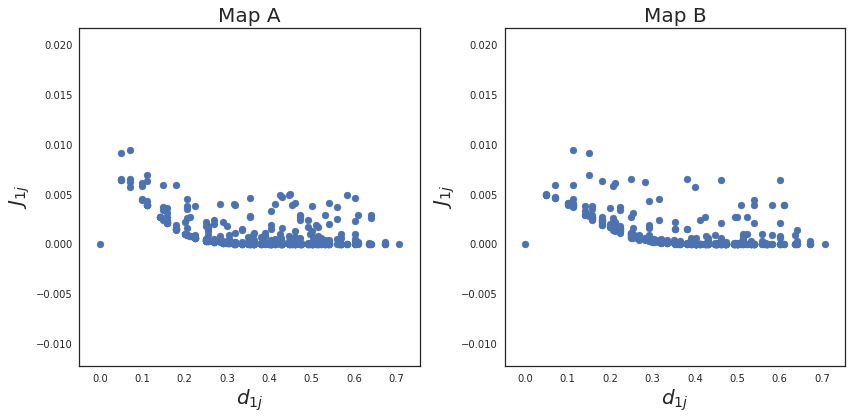

In [295]:
figure(figsize(12,6))
subplot(1,2,1)
scatter(dA,Jval)
xlabel(r"$d_{1j}$",fontsize=20)
ylabel(r"$J_{1j}$",fontsize=20)
title("Map A",fontsize=20)
subplot(1,2,2)
scatter(dB,Jval)
xlabel(r"$d_{1j}$",fontsize=20)
ylabel(r"$J_{1j}$",fontsize=20)
title("Map B",fontsize=20)
tight_layout()

In [ ]:
#TO DO: MEDIA A FISSA DISTANZA

#TENTATIVO DI MEDIA
dpoints=linspace(0,0.72,36)
dwidth=(dpoints[1]-dpoints[0])/2.0
Jval=np.zeros(dpoints.shape)
Jvalc=np.zeros(dpoints.shape)
dA=np.zeros(J.shape)
dB=np.zeros(J.shape)
for i in range(len(J)):
    for j in range(len(J)):
        dA[i][j]=PeriodicDistance(gridA[i],gridA[j])
        dB[i][j]=PeriodicDistance(gridB[i],gridB[j])

for i in range(len(J)):
    for j in range(len(J)):
        for k in range(len(dpoints)):
            if dpoints[k]-dwidth<dA[i][j]<=dpoints[k]+dwidth:
                Jval[k]=Jval[k]+J[i][j]
                Jvalc[k]=Jvalc[k]+1
        

for i in range(len(Jval)):
    if Jval[i]>0:
        Jval[i]=Jval[i]/Jvalc[i]
